# 🏠 Regressão Lasso (L1) no **Boston Housing Dataset**

## 📌 Sobre o Dataset
O **Boston Housing Dataset** é um conjunto de dados clássico utilizado para prever o preço médio das casas em diferentes bairros de Boston. O objetivo deste projeto é aplicar **Regressão Lasso (L1)** para encontrar os principais fatores que impactam no valor dos imóveis.

As características do dataset incluem:
- 🏡 **ZN** – Proporção de terrenos residenciais  
- 🏭 **INDUS** – Proporção de terrenos industriais  
- 🚦 **NOX** – Concentração de poluentes no ar  
- 📏 **RM** – Número médio de quartos por residência  
- 🌍 **DIS** – Distância dos centros comerciais  
- 🎓 **PTRATIO** – Taxa de alunos por professor  
- 📊 **LSTAT** – Percentual de classe baixa na população  
- 💲 **MEDV** – Valor mediano das casas (variável alvo)  

---

## 🚀 O que este código faz?
Este código implementa um modelo de **Regressão Lasso (L1)** para prever os preços dos imóveis. Ele inclui:

✔ **Carregamento e visualização do dataset**  
✔ **Análise exploratória e matriz de correlação**  
✔ **Normalização e transformação dos dados** (StandardScaler e PowerTransformer)  
✔ **Ajuste de hiperparâmetros** com **GridSearchCV**  
✔ **Treinamento do modelo de regressão Lasso (L1)**  
✔ **Avaliação do modelo** com métricas como **MAE, RMSE, R² e acurácia baseada na margem de erro**  
✔ **Visualizações com gráficos de erro, dispersão e comparação entre predições e valores reais**  
✔ **Teste com novos dados para prever o preço estimado de uma casa**  

---

## 🛠️ Como rodar o código?
Antes de rodar o código, certifique-se de ter as bibliotecas instaladas:

```bash
pip install numpy pandas scikit-learn seaborn matplotlib


      CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  PTRATIO  \
0  0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0     15.3   
1  0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0     17.8   
2  0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0     17.8   
3  0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0     18.7   
4  0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0     18.7   

        B  LSTAT  target  
0  396.90   4.98    24.0  
1  396.90   9.14    21.6  
2  392.83   4.03    34.7  
3  394.63   2.94    33.4  
4  396.90   5.33    36.2  


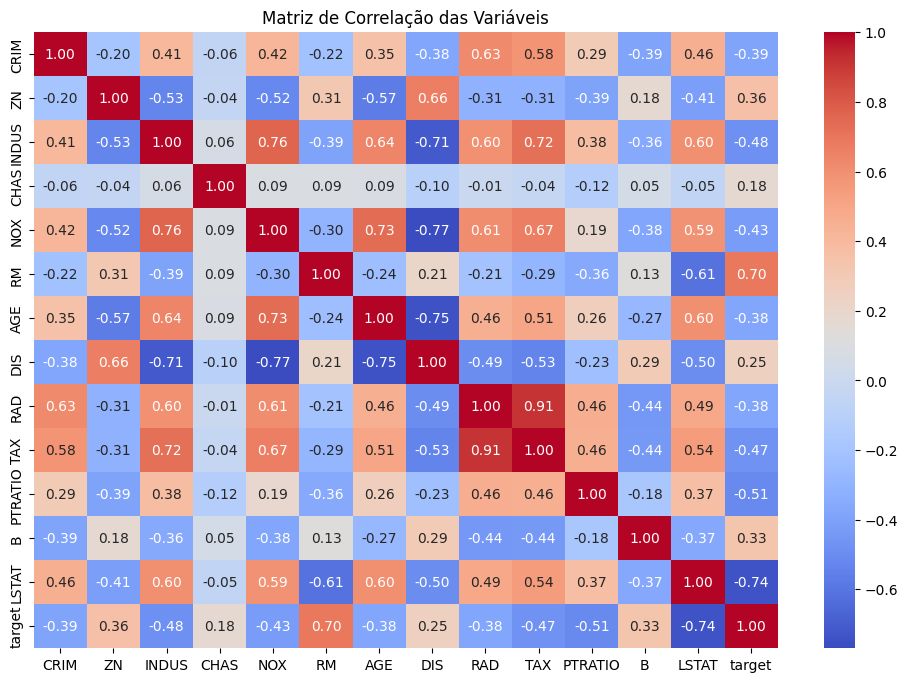

🔍 Melhor Alpha encontrado: 0.013894954943731374
🔍 Melhor Max Iter: 1000
🔍 Melhor Tolerância: 0.01
📊 MAE: 3.0596
📊 RMSE: 4.5393
📊 R²: 0.7190
📊 Acurácia margem de erro: 53.92%


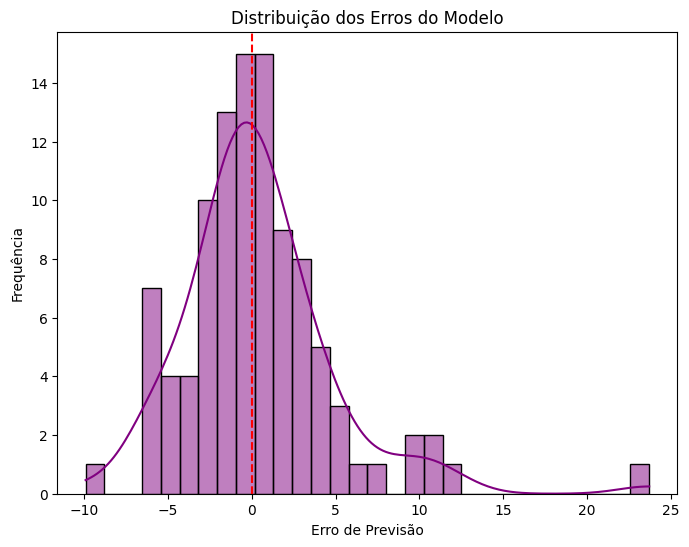

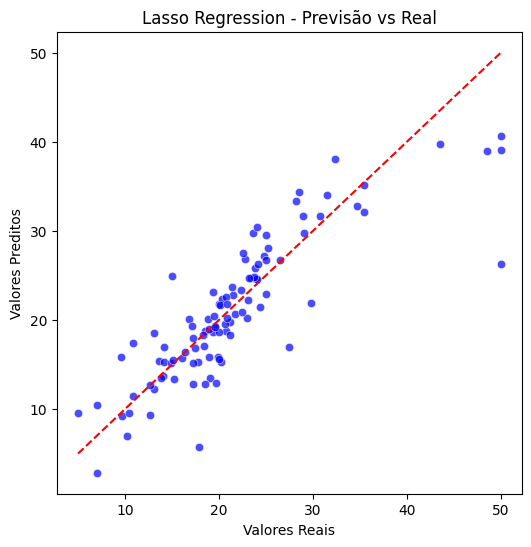

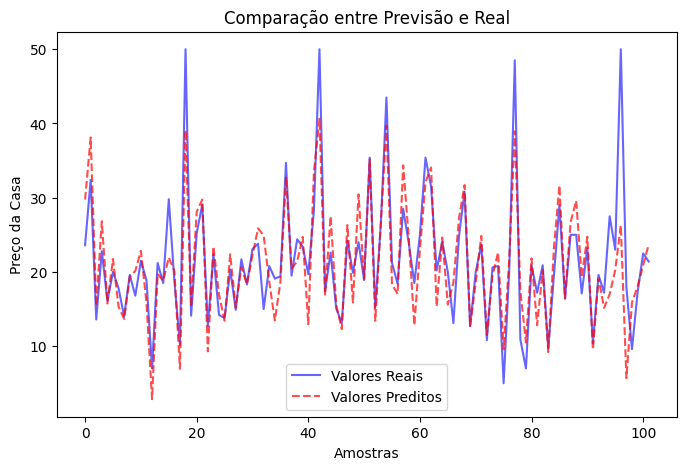


🔮 Previsão para novos dados: $32.28 (mediana das casas)


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

# 🔹 1. Carregar o dataset BOSTON HOUSING
df = fetch_openml(name="boston", version=1, as_frame=True).frame

# Renomear a variável alvo
df.rename(columns={'MEDV': 'target'}, inplace=True)

# Exibe os cabeçalho dos dados
print(df.head(5))

# 🔹 2. Análise Exploratória com Heatmap de Correlação
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação das Variáveis')
plt.show()

# 🔹 3. Separar os dados em treino e teste (Holdout)
X = df.drop(columns=['target'])
y = df['target']


# 🔹 4. Normalização e Transformação dos dados
scaler = StandardScaler()
power_transformer = PowerTransformer()
X_scaled = scaler.fit_transform(X)
X_transformed = power_transformer.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

# 🔹 5. Ajuste de Hiperparâmetros com GridSearchCV
param_grid = {
    'alpha': np.logspace(-4, 1, 50),
    'max_iter': [1000, 5000, 10000],
    'tol': [1e-4, 1e-3, 1e-2]
}

grid_search = GridSearchCV(Lasso(), param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Melhor modelo encontrado
best_alpha = grid_search.best_params_['alpha']
best_max_iter = grid_search.best_params_['max_iter']
best_tol = grid_search.best_params_['tol']

modelo = Lasso(alpha=best_alpha, max_iter=best_max_iter, tol=best_tol)
modelo.fit(X_train, y_train)

print(f"🔍 Melhor Alpha encontrado: {best_alpha}")
print(f"🔍 Melhor Max Iter: {best_max_iter}")
print(f"🔍 Melhor Tolerância: {best_tol}")

# 🔹 6. Fazer previsões
y_pred = modelo.predict(X_test)

# 🔹 7. Avaliação do Modelo
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Cálculo da acurácia baseada na margem de erro de 10%
acuracia = np.mean(np.abs(y_pred - y_test) / y_test < 0.1)

print(f"📊 MAE: {mae:.4f}")
print(f"📊 RMSE: {rmse:.4f}")
print(f"📊 R²: {r2:.4f}")
print(f"📊 Acurácia margem de erro: {acuracia:.2%}")

# 🔹 8. Gráficos de Visualização

## 📌 Gráfico de Distribuição dos Erros
residuos = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuos, bins=30, kde=True, color="purple")
plt.axvline(x=0, color='red', linestyle='--')
plt.xlabel("Erro de Previsão")
plt.ylabel("Frequência")
plt.title("Distribuição dos Erros do Modelo")
plt.show()

## 📌 Gráfico de Previsão vs Real
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7, color="blue")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Valores Reais")
plt.ylabel("Valores Preditos")
plt.title("Lasso Regression - Previsão vs Real")
plt.show()

## 📌 Gráfico de Comparação entre Predito e Real
plt.figure(figsize=(8, 5))
plt.plot(y_test.values, label='Valores Reais', linestyle='-', color='blue', alpha=0.6)
plt.plot(y_pred, label='Valores Preditos', linestyle='--', color='red', alpha=0.7)
plt.xlabel("Amostras")
plt.ylabel("Preço da Casa")
plt.title("Comparação entre Previsão e Real")
plt.legend()
plt.show()

# 🔹 9. Teste com Novos Dados
novos_dados = np.array([[0.2, 18.0, 2.3, 0.0, 0.4, 6.2, 55.0, 5.0, 3.0, 240.0, 16.0, 390.0, 5.0]])
novos_dados_scaled = scaler.transform(novos_dados)
novos_dados_transformed = power_transformer.transform(novos_dados_scaled)
previsao_nova = modelo.predict(novos_dados_transformed)

print(f"\n🔮 Previsão para novos dados: ${previsao_nova[0]:.2f} (mediana das casas)")